 # Applying SGD


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


ow = pd.read_csv('overweight_dataset.csv')

X = ow[['Height']]
y = ow[['Weight']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#sgdr instance
sgdr = SGDRegressor(tol=0.0001, eta0=0.0001,max_iter=10000)

#SGDR train
sgdr.fit(X_train,y_train)

#sgdr predict
y_pred = sgdr.predict(X_test)

rmse = root_mean_squared_error(y_test,y_pred)
print(rmse)


19.30089027727118


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


we got a root-mean-square error not very far from 20.

Given that we are talking about **weights of humans in kilograms**, 20 units is very significant. Our model didn't do very well, as expected.

# SGD for Classification

# Decision Boundary

We can also use gradient descent for classification!

    import matplotlib.pyplot as plt
    import pandas as pd


    ow = pd.read_csv("overweight_dataset.csv", usecols=["Height", "Weight", "OW"])

    plt.figure(figsize=(8,6))
    plt.scatter(df["Height"], df["Weight"], c = df["OW"])
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.show()
    

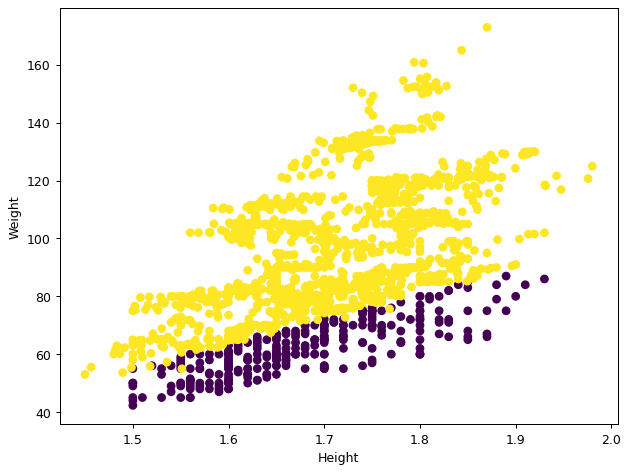




Even though classification, in general, isn't a regression issue, we can visually see that there's a line serving as a boundary between the overweight and the non-overweight subjects. We can look at this as a linear problem is disguise! The SGDClassifier class can help us with this!

In [5]:
print(ow['OW'].value_counts(normalize=True)*100)

OW
True     84.393692
False    15.606308
Name: proportion, dtype: float64


We can see that 85% of OW dataset are overweighted people

##Unbalanced dataset

We see in `SGDClassifier`'s documentation that it has a hyperparameter that doesn't exist for its regressor counter-parameter: `class_weight`.

    *class_weight : dict, {class_label: weight} or “balanced”, default=None

    Preset for the `class_weight` fit parameter.

    Weights associated with classes. If not given, all classes are supposed to have weight one.

    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).*

This hyperparameter allows us to account for the imbalance in the dataset.

Given that the set is imbalanced, we can't use accuracy as our evaluation metric. We'll use sklearn.`metrics.classification_report`, the details of which are also beyond the present scope.

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

sgdc = SGDClassifier(class_weight="balanced")
sgdc.fit(X_train,y_train)
y_pred = sgdc.predict(X_test)

report =classification_report(y_test,y_pred)
print(report)